## Questions:

Q1: How many rows and columns are there in books.csv dataset?

Q2: How many books do not have an original title?

Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('books.csv')

In [3]:
df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9788,23399022,23399022,42955411,21,525427651,9.780525e+12,"Amanda Berry, Gina DeJesus, Mary Jordan, Kevin...",2015.0,Hope,...,9102,927,101,195,1180,3301,4325,https://images.gr-assets.com/books/1421708177m...,https://images.gr-assets.com/books/1421708177s...,0
395,9847,20685373,20685373,40000267,18,307720659,9.780308e+12,Suki Kim,2014.0,"Without You, There Is No Us: My Time with the ...",...,10002,1426,145,523,2526,4328,2480,https://images.gr-assets.com/books/1405292426m...,https://images.gr-assets.com/books/1405292426s...,0
396,9887,503248,503248,491309,21,307381269,9.780307e+12,"Howard Dully, Charles Fleming",2007.0,My Lobotomy,...,9615,1247,142,788,2979,3585,2121,https://images.gr-assets.com/books/1320449273m...,https://images.gr-assets.com/books/1320449273s...,0
397,9960,127970,127970,1066433,26,739416383,9.780739e+12,Terry Ryan,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",...,11151,1849,118,498,2739,4816,2980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


# Q1: How many rows and columns are there in books.csv dataset?

In [4]:
# For rows, df.shape[0] can also be used and for columns df.num_columns can also be used
print('Number of rows = {}'.format(len(df)), 'and Number of columns = {}'.format(df.shape[1]))

Number of rows = 399 and Number of columns = 24


# Q2: How many books do not have an original title?

In [5]:
print('Number of books that do not have an original title are {}'.format(len(df[df['original_title'].isna()])))

Number of books that do not have an original title are 36


# Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [6]:
df1 = df[df['original_title'].notnull()]

In [7]:
print('Number of unique books present are {}'.format(len(df1['book_id'].unique())))

Number of unique books present are 363


# Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [8]:
# We can also sum all the ratings by iterating and divide by the number of rows
print('Average rating of all the books is {}'.format(df['average_rating'].mean()))

Average rating of all the books is 3.9837844611528817


# Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [9]:
print('Number of books published in the year 2000 is {}'.format(len(df[df['original_publication_year'] == 2000])))

Number of books published in the year 2000 is 8


# Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [10]:
# Finding the max number of ratings and then finding the title of it
print(df[df['work_ratings_count'] == df['work_ratings_count'].max()]['title'].values[0])

The Diary of a Young Girl


# Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

In [11]:
# Creating a new column called target inorder to classify into each buckets
df['target'] = 0

for i in range(len(df)):
    for x in range(11):
        if df['average_rating'][i] >= x/2 and df['average_rating'][i] < (x + 1)/2:
            df.loc[i, 'target'] = x/2

In [12]:
# All the ratings are above 3
df['target'].value_counts()

4.0    199
3.5    191
3.0      7
4.5      2
Name: target, dtype: int64

Text(0, 0.5, 'Number of books')

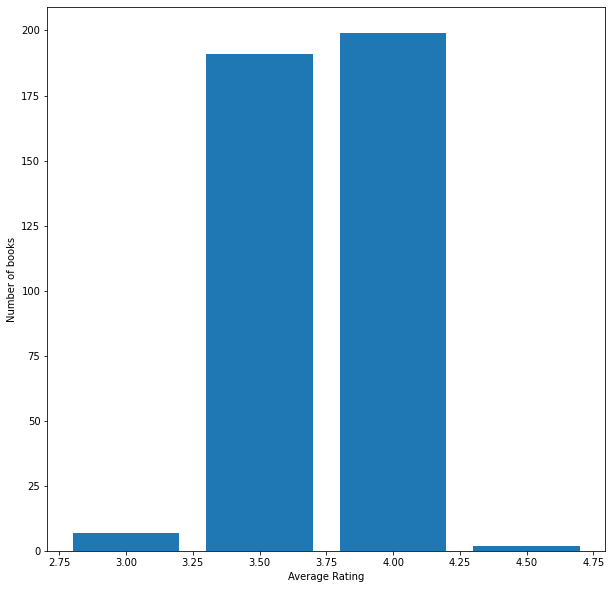

In [13]:
d = df['target'].value_counts()
plt.figure(figsize = (10, 10))
plt.bar(d.index, d.values, width = 0.4)
plt.xlabel('Average Rating')
plt.ylabel('Number of books')